In [8]:
import os
import theano
import lasagne
import pandas as pd
import numpy as np
import theano.tensor as T
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def get_data(file_name):
    stock_data = pd.read_csv(file_name)
    
    # Sort data by date.
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data = stock_data.sort_values(by='Date')
    stock_data.reset_index(drop=True, inplace=True)
    
    sliced_data = stock_data['Open']

    # Just getting returns.
    returns = [0]
    for i in range(1, len(sliced_data)):
        returns.append(sliced_data[i] - sliced_data[i-1])
    
    plt.plot(sliced_data)
    plt.title(file_name)
    plt.xlabel('time')
    plt.show()
    
    return sliced_data, returns

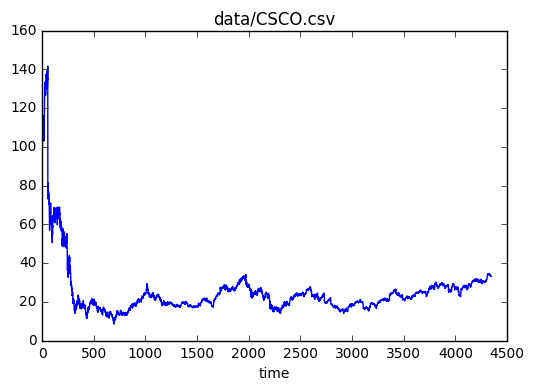

In [10]:
data, returns = get_data('data/CSCO.csv')

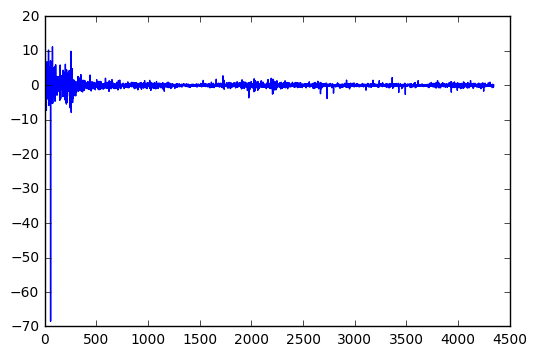

In [12]:
plt.plot(returns)
plt.show()

In [11]:
def sample_random_batches(source, n_batches=10, seq_len=20):
    X_batch, y_batch = np.zeros((n_batches, seq_len)), np.zeros(n_batches)
    
    for i in xrange(n_batches):
        pos = np.random.randint(0, source.size - seq_len)
        X_batch[i, :] = source[pos:pos+seq_len]
        y_batch[i] = source[pos+seq_len]

    return X_batch, y_batch

In [17]:
X, y = sample_random_batches(data, 4, 5)
print X
print y

[[ 63.8125    64.5       64.5       62.375     64.8125  ]
 [ 21.32      20.610001  20.969999  20.84      21.16    ]
 [ 11.48      11.6       12.1       10.74      10.79    ]
 [ 13.48      13.95      13.6       13.16      13.08    ]]
[ 65.5   21.48  11.05  13.14]


In [24]:
seq_length = 30  # How long graients are spread.
grad_clip = 10  # Max gradient's module.
input_sequence, target_values = T.matrix('input sequence', 'float32'),  T.ivector('target y')

In [45]:
net = lasagne.layers.InputLayer(shape=(None, None), input_var=input_sequence)

net = lasagne.layers.RecurrentLayer(net, 64, only_return_final=True)
print net.output_shape

net = lasagne.layers.DenseLayer(net, 1, nonlinearity=T.nnet.softmax)

In [43]:
# Model's weights.
weights = lasagne.layers.get_all_params(net, trainable=True)
print weights

[]


In [41]:
network_output = lasagne.layers.get_output(net)